# Titanic Data Science trial
### questions:
predict which passengers survived the tragedy.

### some observed insights

some groups of people were more likely to survive than others, such as women, children, and the upper-class.

### Workflow
1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.



## 0. import packages

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

## 1. read data set

In [3]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
combine=[train_df,test_df]

### glimpse of data
- features: categorical, numerical, 
- mixed data types. 
- errors, typos, blank, null, empty values.

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


find out null object

In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### Pclass 1 has higher survival rate.

In [8]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### Female passenger has higher survival rate.

In [9]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


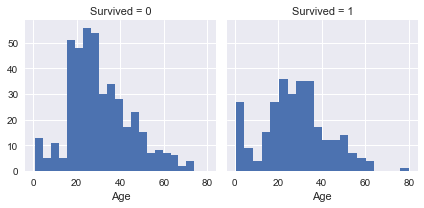

In [11]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

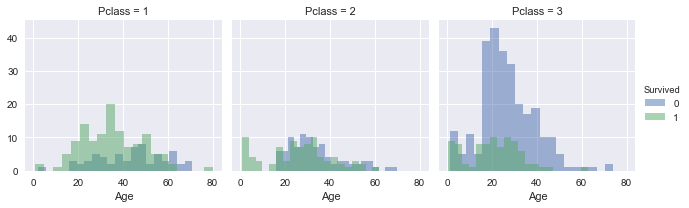

In [12]:
grid=sns.FacetGrid(train_df,col='Pclass',hue='Survived')
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

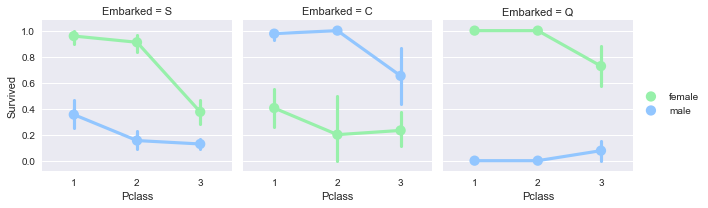

In [13]:
grid=sns.FacetGrid(train_df,col='Embarked')
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='pastel')
grid.add_legend()

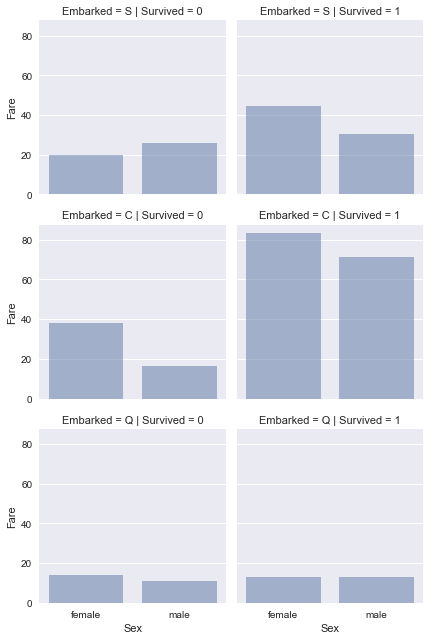

In [14]:
grid=sns.FacetGrid(train_df,row='Embarked',col='Survived')
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

## Wrangle data

In [15]:
## we drop ticket and cabin feature
train_df=train_df.drop(['Ticket','Cabin','Name','Embarked','PassengerId'],axis=1)
test_df=test_df.drop(['Ticket','Cabin','Name','Embarked','PassengerId'],axis=1)

In [16]:
combine=[train_df,test_df]

In [17]:
train_df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


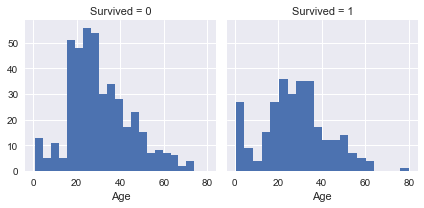

In [18]:
## age is important. but it has empty value.
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

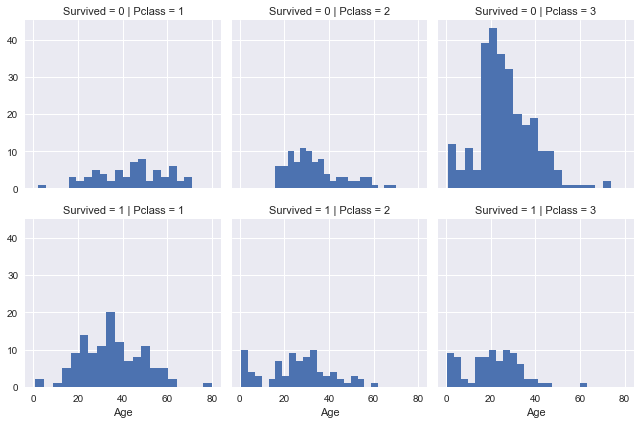

In [19]:
## how to create it
grid = sns.FacetGrid(train_df,col='Pclass',row='Survived')
grid.map(plt.hist, 'Age',bins=20)

In [20]:
## replace nan in age with random. normal  number
for i in range(3):
    agep = train_df[train_df.Pclass == i+1]['Age'].dropna()
    age_guess = agep.median()
    train_df.loc[(train_df.Age.isnull()) & (train_df.Pclass == i+1) ,'Age']= np.random.normal(age_guess, 3)
    test_df.loc[(test_df.Age.isnull()) & (test_df.Pclass == i+1),'Age'] = np.random.normal(age_guess, 3)




In [21]:
train_df.loc[train_df.Age.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare


In [22]:
## there is null in Fare
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null object
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [23]:
farep = test_df.Fare.dropna()

test_df.loc[(test_df.Fare.isnull()) ,'Fare'] = farep.median()
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null object
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [24]:
## change sex to number
#dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
# train_df.loc[(train_df.Sex =='male'),'Sex']= 1
# train_df.loc[(train_df.Sex =='female'),'Sex']= 0

# test_df.loc[(train_df.Sex =='male'),'Sex']= 1
# test_df.loc[(train_df.Sex =='female'),'Sex']= 0



In [25]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB


In [26]:
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


## modeling

In [27]:
from sklearn.model_selection import train_test_split
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()
train_X , valid_X , train_y , valid_y = train_test_split( X_train , Y_train , train_size = .8 )



In [28]:
train_X=pd.get_dummies(train_X)
valid_X=pd.get_dummies(valid_X)

In [29]:
from sklearn.metrics import f1_score
train_X , valid_X , train_y , valid_y = train_test_split( X_train , Y_train , train_size = .8 )

#encode them
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
#cat_1hot = encoder.fit_transform()

# scale them
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_X)
train_X = scaler.transform(train_X)
valid_X = scaler.transform(valid_X)



In [30]:
list(X_test),list(X_train)

(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],
 ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])

In [31]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train, Y_train) * 100, 2)
acc_log

80.469999999999999

In [32]:
## split train test into two set. since we don't have answer for test set.


In [33]:
# from sklearn.metrics import f1_score
# f1_score(y_test,y_pred)

In [34]:
# Support Vector Machines

svc = SVC()
svc = SVC()
svc.fit(X_train,Y_train)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

90.799999999999997

In [35]:
#  knn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
acc_knn


84.849999999999994

In [36]:
# linear_svc
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
Y_pred = tree.predict(X_test)


acc_tree = round(tree.score(X_train,Y_train)*100,2)
acc_tree

98.200000000000003

In [38]:
random_forest = RandomForestClassifier(n_estimators=35)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.980000000000004

## split train to train and test for cross_validation

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
train_X , valid_X , train_y , valid_y = train_test_split( X_train , Y_train , train_size = .8 )


In [40]:
# tree
tree.fit(train_X,train_y)
Y_pred = tree.predict(valid_X)
f1_score(valid_y,Y_pred)

0.72258064516129028

In [41]:
# forest
random_forest.fit(train_X,train_y)
Y_pred = random_forest.predict(valid_X)
f1_score(valid_y,Y_pred)

0.75496688741721851

In [42]:
# what if we normalize them
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_X)
standardized_X = scaler.transform(train_X)
standardized_X_test = scaler.transform(valid_X)
 
 

In [80]:
random_forest.fit(standardized_X,train_y)
Y_pred = random_forest.predict(standardized_X_test)
f1_score(valid_y,Y_pred)
## it improved a bit.


0.75324675324675328

## use xgboost

In [81]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
sc = StandardScaler()
#train_X = sc.fit_transform(train_X)
#valid_X = sc.transform(valid_X)
xgb.fit(standardized_X,train_y)
Y_pred = xgb.predict(standardized_X_test)
f1_score(valid_y,Y_pred)

0.75496688741721851

## use lightgbm

In [45]:
import lightgbm as lgb
lgbc = lgb.LGBMClassifier()
lgbc.fit(train_X,train_y)
Y_pred = lgbc.predict(valid_X)
f1_score(valid_y,Y_pred)

0.77027027027027029

In [54]:
train_X.shape

(712, 6)

## use ann

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [61]:
cla1 = Sequential()
cla1.add(Dense(activation="relu", input_dim=6, units=3, kernel_initializer="uniform"))

In [62]:
cla1.add(Dense(activation = 'relu', units = 6, kernel_initializer = 'uniform'))

In [63]:
cla1.add(Dense( activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

In [64]:
cla1.compile(optimizer = 'adam', loss ='binary_crossentropy')

In [65]:
cla1.fit(train_X,train_y,batch_size=10,epochs=20)

Epoch 1/20


IndexError: indices are out-of-bounds

In [66]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,3,1,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,3,0,35.000000,0,0,8.0500
5,3,0,21.118427,0,0,8.4583
6,1,0,54.000000,0,0,51.8625
7,3,0,2.000000,3,1,21.0750
8,3,1,27.000000,0,2,11.1333
9,2,1,14.000000,1,0,30.0708


## submission

In [82]:
# let's submit our results!
Y_predi = xgb.predict(X_test)
test_df=pd.read_csv('test.csv')


submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],
                          "Survived":Y_predi})

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5'] ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
expected f0, f4, f5, f3, f2, f1 in input data
training data did not have the following fields: Parch, Pclass, Sex, Fare, Age, SibSp

In [50]:
submission.to_csv('../submission.csv', index=False)

## result of submission
- randomforet= 0.73684
- tree = 0.66986
- xgboost = 0.79426  (!!!)

## things to do. 
- onehotencoder. 
- neural network.
- tidy up.
- WAYS TO improve score?

# test

In [ ]:
test_df3=pd.read_csv('test.csv')

In [ ]:
from xgboost import XGBClassifier

In [ ]:
test_df

In [ ]:
import lightgbm as lgb

In [ ]:
class Set:
    def __init__(self, values=None):
        

In [ ]:
import re
not re.search('a','dog')

In [ ]:
5/2

In [ ]:
dicc = {}
dicc = {'d':50,'wqer':60}

In [ ]:
dicc